In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
import os
from PIL import Image

train_image = os.listdir(r"C:\Users\BMEI CMU\Documents\GitHub\WORK\Windows\CODE_BME\PROJECT_MALARIA\DATA_SET\train_images")
train_label = pd.read_csv(r"C:\Users\BMEI CMU\Documents\GitHub\WORK\Windows\CODE_BME\PROJECT_MALARIA\DATA_SET\train.csv")
test_image = os.listdir(r"C:\Users\BMEI CMU\Documents\GitHub\WORK\Windows\CODE_BME\PROJECT_MALARIA\DATA_SET\test_images")
test_label = pd.read_csv(r"C:\Users\BMEI CMU\Documents\GitHub\WORK\Windows\CODE_BME\PROJECT_MALARIA\DATA_SET\test.csv")
output_dir = r"C:\Users\BMEI CMU\Documents\GitHub\WORK\Windows\CODE_BME\PROJECT_MALARIA\DATA_SET\YOLOV8"

# ตั้งค่า K-Fold Cross Validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
train_image_df = pd.DataFrame({"filename": train_image})

# วนลูปเพื่อสร้าง train/test set และบันทึก TXT
for fold, (train_idx, test_idx) in enumerate(kf.split(train_image_df)):
    fold_dir = os.path.join(output_dir, f"fold_{fold+1}")

    image_train_dir = os.path.join(fold_dir, "train", "images")
    label_train_dir = os.path.join(fold_dir, "train", "labels")

    image_val_dir = os.path.join(fold_dir, "validation", "images")
    label_val_dir = os.path.join(fold_dir, "validation", "labels")

    image_test_dir = os.path.join(fold_dir, "test", "images")
    label_test_dir = os.path.join(fold_dir, "test", "labels")

    os.makedirs(image_train_dir, exist_ok=True)
    os.makedirs(label_train_dir, exist_ok=True)

    os.makedirs(image_val_dir, exist_ok=True)
    os.makedirs(label_val_dir, exist_ok=True)

    os.makedirs(image_test_dir, exist_ok=True)
    os.makedirs(label_test_dir, exist_ok=True)

    # แยก train และ validation set
    train_fold_df = train_image_df.iloc[train_idx].reset_index(drop=True)
    test_fold_df = train_image_df.iloc[test_idx].reset_index(drop=True)

    # Save train images
    for image_name in train_fold_df["filename"]:
        src_path = os.path.join(r"C:\Users\BMEI CMU\Documents\GitHub\WORK\Windows\CODE_BME\PROJECT_MALARIA\DATA_SET\train_images", image_name)
        dest_path = os.path.join(image_train_dir, image_name)
        if os.path.exists(src_path):
            Image.open(src_path).save(dest_path)

    # Save validation images
    for image_name in test_fold_df["filename"]:
        src_path = os.path.join(r"C:\Users\BMEI CMU\Documents\GitHub\WORK\Windows\CODE_BME\PROJECT_MALARIA\DATA_SET\train_images", image_name)
        dest_path = os.path.join(image_val_dir, image_name)
        if os.path.exists(src_path):
            Image.open(src_path).save(dest_path)
    
    # Save test images
    for image_name in test_image:
        src_path = os.path.join(r"C:\Users\BMEI CMU\Documents\GitHub\WORK\Windows\CODE_BME\PROJECT_MALARIA\DATA_SET\test_images", image_name)
        dest_path = os.path.join(image_test_dir, image_name)
        if os.path.exists(src_path):
            Image.open(src_path).save(dest_path)

    # Dictionary สำหรับ mapping ชื่อคลาสเป็นตัวเลข
    class_mapping = {"red blood cell": 0,"trophozoite": 1,"schizont": 2,"difficult": 3,"ring": 4,"leukocyte": 5,"gametocyte": 6}

    def convert_bbox(xmin, ymin, xmax, ymax, img_width, img_height):
        center_x = (xmin + xmax) / (2 * img_width)
        center_y = (ymin + ymax) / (2 * img_height)
        width = (xmax - xmin) / img_width
        height = (ymax - ymin) / img_height
        return center_x, center_y, width, height

    # Save train labels as TXT
    for image_name in train_fold_df["filename"]:
        label_file_path = os.path.join(label_train_dir, os.path.splitext(image_name)[0] + ".txt")
        label_data = train_label[train_label['image_name'] == image_name]
        image_path = os.path.join(r"C:\Users\BMEI CMU\Documents\GitHub\WORK\Windows\CODE_BME\PROJECT_MALARIA\DATA_SET\train_images", image_name)
        img = Image.open(image_path)
        img_width, img_height = img.size
        with open(label_file_path, 'w') as f:
            for _, row in label_data.iterrows():
                class_id = class_mapping.get(row['label'], -1)
                if class_id != -1:
                    cx, cy, w, h = convert_bbox(row['xmin'], row['ymin'], row['xmax'], row['ymax'], img_width, img_height)
                    f.write(f"{class_id} {cx:.6f} {cy:.6f} {w:.6f} {h:.6f}\n")

    # Save validation labels as TXT
    for image_name in test_fold_df["filename"]:
        label_file_path = os.path.join(label_val_dir, os.path.splitext(image_name)[0] + ".txt")
        label_data = train_label[train_label['image_name'] == image_name]
        image_path = os.path.join(r"C:\Users\BMEI CMU\Documents\GitHub\WORK\Windows\CODE_BME\PROJECT_MALARIA\DATA_SET\train_images", image_name)
        img = Image.open(image_path)
        img_width, img_height = img.size
        with open(label_file_path, 'w') as f:
            for _, row in label_data.iterrows():
                class_id = class_mapping.get(row['label'], -1)
                if class_id != -1:
                    cx, cy, w, h = convert_bbox(row['xmin'], row['ymin'], row['xmax'], row['ymax'], img_width, img_height)
                    f.write(f"{class_id} {cx:.6f} {cy:.6f} {w:.6f} {h:.6f}\n")

    # Save test labels as TXT
    for image_name in test_image:
        label_file_path = os.path.join(label_test_dir, os.path.splitext(image_name)[0] + ".txt")
        label_data = test_label[test_label['image_name'] == image_name]
        image_path = os.path.join(r"C:\Users\BMEI CMU\Documents\GitHub\WORK\Windows\CODE_BME\PROJECT_MALARIA\DATA_SET\test_images", image_name)
        img = Image.open(image_path)
        img_width, img_height = img.size
        with open(label_file_path, 'w') as f:
            for _, row in label_data.iterrows():
                class_id = class_mapping.get(row['label'], -1)
                if class_id != -1:
                    cx, cy, w, h = convert_bbox(row['xmin'], row['ymin'], row['xmax'], row['ymax'], img_width, img_height)
                    f.write(f"{class_id} {cx:.6f} {cy:.6f} {w:.6f} {h:.6f}\n")

In [ ]:
import os

def create_yaml_files(dataset_path, num_folds, class_names):
    """
    สร้างไฟล์ .yaml สำหรับแต่ละ fold เพื่อใช้เทรน YOLO
    
    Parameters:
        dataset_path (str): พาธหลักของ dataset
        num_folds (int): จำนวน folds ที่ต้องการสร้าง
        class_names (dict): dictionary ของ class names เช่น {0: 'malaria', 1: 'healthy'}
    """
    for fold in range(1, num_folds + 1):
        fold_dir = os.path.join(dataset_path, f"fold_{fold}").replace('\\', '/')
        yaml_path = os.path.join(fold_dir, f"fold_{fold}.yaml").replace('\\', '/')
        
        yaml_content = f"""# YOLO dataset config file for Fold {fold}
train: {fold_dir}/train/images  # พาธไปยัง train set
val: {fold_dir}/validation/images # พาธไปยัง validation set
test: {fold_dir}/test/images  # พาธไปยัง test set
ืnc: {len(class_names)}
names: [{', '.join(f'"{name}"' for name in class_names.values())}]
"""
        
        # สร้างไฟล์ yaml
        with open(yaml_path, "w", encoding="utf-8") as yaml_file:
            yaml_file.write(yaml_content)
        
        print(f"✅ สร้างไฟล์ YAML สำหรับ Fold {fold}: {yaml_path}")

# ตัวอย่างการใช้งาน
dataset_path = "C:/Users/BMEI CMU/Documents/GitHub/WORK/Windows/CODE_BME/PROJECT_MALARIA/DATA_SET/YOLOV8"  # พาธหลักของ dataset
num_folds = 10  # จำนวน folds
class_names = {
    0: "red blood cell",
    1: "trophozoite",
    2: "schizont",
    3: "difficult",
    4: "ring",
    5: "leukocyte",
    6: "gametocyte"
}

create_yaml_files(dataset_path, num_folds, class_names)

In [ ]:
from ultralytics import YOLO

# เป็นการสร้างโมเดลใหม่ขึ้นมา
model = YOLO('yolov8n.yaml')

# โหลด pretrained model มาเพื่อให้เราไม่ต้องเทรนใหม่ทั้งหมดตั้งแต่เริ่ม
model = YOLO('yolov8n.pt')

# เทรนโมเดลโดยใช้ datasets ของเรา ซึ่งให้เราหาไฟล์ data.yaml 
# ในโฟลเดอร์ Datasets ของเราเเล้วเอา Path มาวางตรง data=
# แนะนำว่าให้เอา Path ทั้งหมดมาเลย
# epoch = 3 คือเราเทรนทั้งหมด 3 รอบ
path = r'C:\Users\BMEI CMU\Documents\GitHub\WORK\Windows\CODE_BME\PROJECT_MALARIA\DATA_SET\YOLOV8\fold_1\fold_1.yaml'
results = model.train(data=path, epochs=3)

# ทดสอบโมเดลโดยใช้ validation datasets ที่เตรียมไว้
results = model.val()

# เซฟโมเดลโดยให้โมเดลอยู่ใน ONNX format
success = model.export(format='onnx')

Loading C:\Users\BMEI CMU\Documents\GitHub\WORK\runs\detect\train\weights\best.onnx for ONNX Runtime inference...
Using ONNX Runtime CPUExecutionProvider

image 1/1 C:\Users\BMEI CMU\Documents\GitHub\WORK\Windows\CODE_BME\PROJECT_MALARIA\DATA_SET\YOLOV8\fold_1\test\images\0e0bc36f-6fb2-4763-b0a1-b4c67b2d2d2a.jpg: 640x640 23 red blood cells, 42.0ms
Speed: 6.6ms preprocess, 42.0ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)


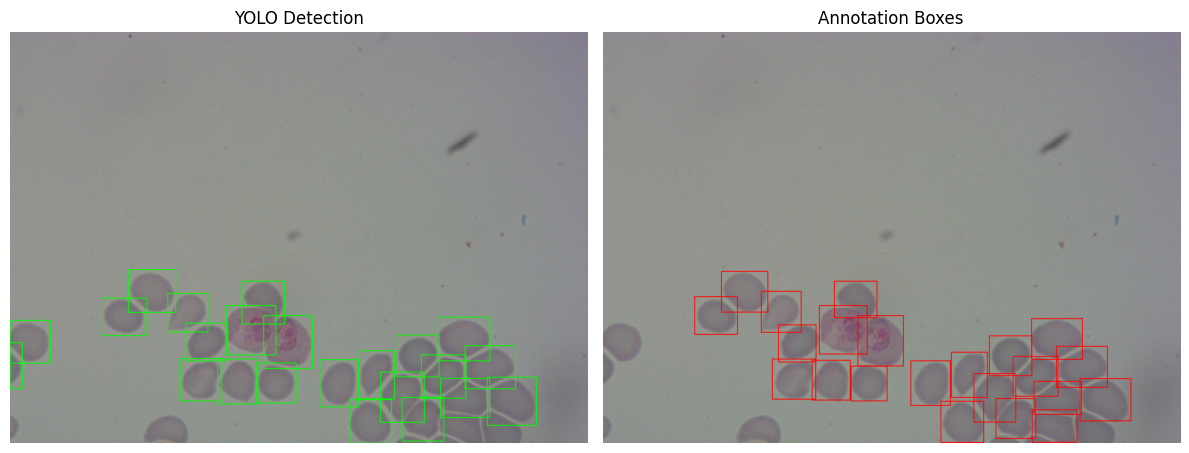

In [1]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Paths
model_path = 'C:/Users/BMEI CMU/Documents/GitHub/WORK/runs/detect/train/weights/best.onnx'
image_path = "C:/Users/BMEI CMU/Documents/GitHub/WORK/Windows/CODE_BME/PROJECT_MALARIA/DATA_SET/YOLOV8/fold_1/test/images/0e0bc36f-6fb2-4763-b0a1-b4c67b2d2d2a.jpg"
txt_path = "C:/Users/BMEI CMU/Documents/GitHub/WORK/Windows/CODE_BME/PROJECT_MALARIA/DATA_SET/YOLOV8/fold_1/test/labels/0e0bc36f-6fb2-4763-b0a1-b4c67b2d2d2a.txt"

# Load the YOLO model
model = YOLO(model_path)

# Load the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
height, width, _ = image.shape

# Create a copy of the image for YOLO results
image_yolo = image.copy()

# YOLO Detection
results = model(image_path)
boxes = results[0].boxes

# Draw YOLO bounding boxes
for box in boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
    cv2.rectangle(image_yolo, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box for YOLO

# Create a copy of the image for annotation boxes
image_annot = image.copy()

# Read bounding box from annotation file
with open(txt_path, "r") as file:
    lines = file.readlines()

# Draw annotation bounding boxes
for line in lines:
    parts = line.strip().split()
    _, x_center, y_center, box_width, box_height = map(float, parts)

    # Convert normalized coordinates to pixel values
    x_center_pixel = int(x_center * width)
    y_center_pixel = int(y_center * height)
    box_width_pixel = int(box_width * width)
    box_height_pixel = int(box_height * height)

    # Calculate top-left and bottom-right corners
    x1 = int(x_center_pixel - box_width_pixel / 2)
    y1 = int(y_center_pixel - box_height_pixel / 2)
    x2 = int(x_center_pixel + box_width_pixel / 2)
    y2 = int(y_center_pixel + box_height_pixel / 2)

    # Draw the rectangle
    cv2.rectangle(image_annot, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Blue box for annotation

# Plot the images side-by-side for comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image_yolo)
axes[0].set_title("YOLO Detection")
axes[0].axis('off')

axes[1].imshow(image_annot)
axes[1].set_title("Annotation Boxes")
axes[1].axis('off')

plt.tight_layout()
plt.show()